# Alberto Pluecker - Projeto de Bloco: Inteligência Artificial e Machine Learning

https://drive.google.com/file/d/1i0lulIKUECSP5Sil85BXKLdrQZKjWjOu/view?usp=sharing

## Carregamento de Dados: Identifique as características (features) e o alvo (target) nos conjuntos de dados, compreendendo sua estrutura e importância.

In [7]:
import pandas as pd

df = pd.read_csv('iris.csv').dropna()

features = df.drop(columns=['Species', 'Id'])
target = df['Species']

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Divisão de Dados: Separe os dados em conjuntos de treino e validação, essenciais para o desenvolvimento e avaliação de modelos de ML. Você irá dividir 80% dos dados para treino e o restante para validação. 

In [12]:
from sklearn.model_selection import train_test_split

features_treino, features_validacao, target_treino, target_validacao = train_test_split(features, target, test_size=0.2)

## Transformação de Dados: Utilize transformadores do Scikit-Learn para ajustar e padronizar as variáveis dos dados.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_treino_escaladas = scaler.fit_transform(features_treino)
features_validacao_escaladas = scaler.transform(features_validacao)

## Modelagem de K-Nearest Neighbors (KNN): Implemente e ajuste o algoritmo KNN, compreendendo suas nuances e aplicabilidade.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(features_treino_escaladas, target_treino)

KNeighborsClassifier(n_neighbors=3)

## Avaliação de Modelos: Avalie a qualidade do modelo desenvolvido usando acurácia

In [16]:
from sklearn.metrics import accuracy_score

predicoes_validacao = knn.predict(features_validacao_escaladas)
acuracia = accuracy_score(target_validacao, predicoes_validacao)

acuracia

1.0

## Análise de Parâmetros: Explore diferentes valores para o parâmetro K do KNN e analise seu impacto nos resultados obtidos (através da acurácia do modelo para os dados de validação).

In [20]:
k_values = range(1, 100, 2)
acuracias = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features_treino_escaladas, target_treino)
    predicoes_validacao = knn.predict(features_validacao_escaladas)
    acuracia = accuracy_score(target_validacao, predicoes_validacao)
    acuracias.append(acuracia)
    print(f'K={k}: Acurácia = {acuracia:.3f}')

melhor_k = k_values[acuracias.index(max(acuracias))]
melhor_acuracia = max(acuracias)

K=1: Acurácia = 1.000
K=3: Acurácia = 1.000
K=5: Acurácia = 1.000
K=7: Acurácia = 1.000
K=9: Acurácia = 1.000
K=11: Acurácia = 1.000
K=13: Acurácia = 1.000
K=15: Acurácia = 1.000
K=17: Acurácia = 1.000
K=19: Acurácia = 1.000
K=21: Acurácia = 1.000
K=23: Acurácia = 1.000
K=25: Acurácia = 1.000
K=27: Acurácia = 1.000
K=29: Acurácia = 1.000
K=31: Acurácia = 1.000
K=33: Acurácia = 1.000
K=35: Acurácia = 0.967
K=37: Acurácia = 1.000
K=39: Acurácia = 1.000
K=41: Acurácia = 1.000
K=43: Acurácia = 1.000
K=45: Acurácia = 0.967
K=47: Acurácia = 0.967
K=49: Acurácia = 0.967
K=51: Acurácia = 0.967
K=53: Acurácia = 0.967
K=55: Acurácia = 0.967
K=57: Acurácia = 0.967
K=59: Acurácia = 0.967
K=61: Acurácia = 0.967
K=63: Acurácia = 0.967
K=65: Acurácia = 0.967
K=67: Acurácia = 0.967
K=69: Acurácia = 0.967
K=71: Acurácia = 0.967
K=73: Acurácia = 0.967
K=75: Acurácia = 0.967
K=77: Acurácia = 0.833
K=79: Acurácia = 0.533
K=81: Acurácia = 0.567
K=83: Acurácia = 0.333
K=85: Acurácia = 0.333
K=87: Acurácia =

O modelo tem uma acurácia perfeita (1.000) até K=33 e outros valores de K, tendendo a diminuir com K maior. Isso sugere que, para esses valores de K, o modelo é capaz de classificar corretamente todas as amostras no conjunto de validação.

A acurácia cai drasticamente para maiores valores de K, onde o modelo começa a generalizar demais e perder a capacidade de discriminar entre as diferentes calsses.

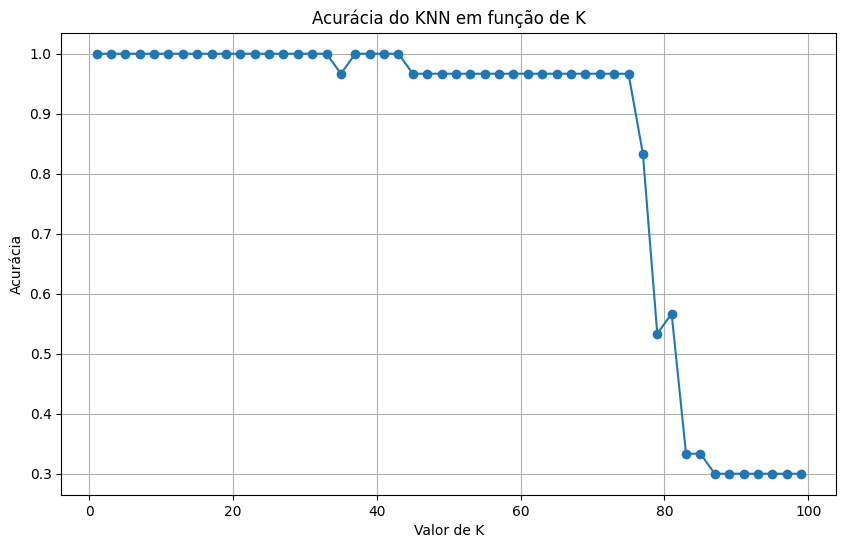

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, acuracias, marker='o')
plt.title('Acurácia do KNN em função de K')
plt.xlabel('Valor de K')
plt.ylabel('Acurácia')
plt.grid(True)
plt.show()

## Resumo

O TP1 abordou a aplicação de um modelo de aprendizado de máquina utilizando o algoritmo K-Nearest Neighbors (KNN). Inicialmente foram identificadas as características (features) e o alvo (target). Os dados foram divididos em conjuntos de treino e validação.

A padronização das variáveis foi realizada com o uso do StandardScaler do Scikit-Learn, garantindo que os dados estivessem normalizados antes de alimentar o modelo.

Posteriormente, foram testados diferentes valores de K e seu impacto no desempenho do modelo. Foram testados valores ímpares de K de 1 a 99, observando-se uma acurácia perfeita (1.0) para valores de K até 33. No entanto, à medida que K aumentou, a acurácia começou a cair, indicando que valores altos de K podem levar à generalização excessiva e a um pior desempenho na classificação. Essa análise reforça a importância de selecionar cuidadosamente o parâmetro K para balancear a precisão e a generalização do modelo.

# TP2 Projeto de Bloco: Inteligência Artificial e Machine Learning [24E3_5]
# Alberto F. Pluecker - 23.09.2024
https://colab.research.google.com/drive/1wgksoDqa4pb3l3XTkBOg0MRZwvE4oIiQ?usp=sharing

In [6]:
import nltk
from nltk.corpus import movie_reviews
import numpy as np

nltk.download('movie_reviews')

reviews = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


## 1. Criação das features: Computar o Term Frequency-Inverse Document Frequency (TF-IDF) para representar a importância das palavras em um conjunto de documentos.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

texts = [" ".join(doc) for doc, category in reviews]

# criar o vetorizador TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)

# computar a matriz TF-IDF
tfidf_matrix = vectorizer.fit_transform(texts)

print(f"Formato Matriz TF-IDF: {tfidf_matrix.shape}")
print(f"Features (palavras):\n{vectorizer.get_feature_names_out()}")

Formato Matriz TF-IDF: (2000, 1000)
Features (palavras):
['10' 'ability' 'able' 'about' 'above' 'absolutely' 'across' 'act'
 'acting' 'action' 'actor' 'actors' 'actress' 'actual' 'actually' 'add'
 'after' 'again' 'against' 'age' 'agent' 'ago' 'air' 'alien' 'aliens'
 'all' 'allen' 'almost' 'alone' 'along' 'already' 'also' 'although'
 'always' 'am' 'amazing' 'america' 'american' 'among' 'an' 'and'
 'animated' 'animation' 'annoying' 'another' 'any' 'anyone' 'anything'
 'anyway' 'apparently' 'appear' 'appears' 'are' 'aren' 'army' 'around'
 'art' 'as' 'ask' 'aspect' 'at' 'atmosphere' 'attempt' 'attempts'
 'attention' 'audience' 'audiences' 'away' 'back' 'bad' 'based'
 'basically' 'batman' 'battle' 'be' 'beautiful' 'because' 'become'
 'becomes' 'been' 'before' 'begin' 'beginning' 'begins' 'behind' 'being'
 'believe' 'ben' 'best' 'better' 'between' 'beyond' 'big' 'biggest' 'bill'
 'bit' 'black' 'blood' 'bob' 'body' 'bond' 'book' 'boring' 'both' 'box'
 'boy' 'break' 'brief' 'brilliant' 'bring'

A matriz resultante tem dimensões [ n° reviews x n° features ] e representa a importância relativa de cada palavra no conjunto de reviews.

## 2. Modelagem de K-Nearest Neighbors (KNN): Criar modelos simples de classificação utilizando a base de dados codificada por TF-IDF. Explore diferentes valores para o parâmetro K do KNN e analise seu impacto nos resultados obtidos (através da acurácia do modelo para os dados de validação).

In [10]:
from typing import List
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, [category for doc, category in reviews], test_size=0.2)

# evaluate_knn avalia o KNN para diferentes valores de K
def evaluate_knn(k_values):
    accuracies = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    return accuracies

k_values = [1, 3, 5, 7, 9]
accuracies = evaluate_knn(k_values)

for k, acc in zip(k_values, accuracies):
    print(f"K = {k}: Acurácia = {acc:.4f}")


K = 1: Acurácia = 0.6475
K = 3: Acurácia = 0.6375
K = 5: Acurácia = 0.6300
K = 7: Acurácia = 0.6425
K = 9: Acurácia = 0.6200


Com valor de K muito baixo (por exemplo, K=1) o modelo pode sofrer com overfitting, capturando muito ruído.

Um K muito alto pode suavizar demais as previsões, resultando em um modelo que não representa as nuances dos dados precisamente.

Com base na análise acima, K=5 ou K=7 parecem ser boas escolhas.

## 3. Avaliação de Modelos: Aplicar técnicas de validação cruzada para estimar a eficiência dos modelos desenvolvidos.

In [12]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)

# cross-validation com 5 folds
cv_scores = cross_val_score(knn, tfidf_matrix, [category for doc, category in reviews], cv=5)

print(f"Resultado da Cross-validation para cada fold: {cv_scores}")

mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Acurácia média: {mean_cv_score:.4f}")
print(f"Desvio Padrão: {std_cv_score:.4f}")


Resultado da Cross-validation para cada fold: [0.5575 0.655  0.645  0.635  0.6275]
Acurácia média: 0.6240
Desvio Padrão: 0.0345


## 4. Avaliação de Classificadores Binários: Utilizar figuras de mérito como Curva ROC, precisão, recall, f1-score, sensibilidade e especificidade para avaliar os modelos.

Relatório de Classificação:
              precision    recall  f1-score   support

         neg       0.76      0.38      0.50       199
         pos       0.59      0.88      0.71       201

    accuracy                           0.63       400
   macro avg       0.67      0.63      0.60       400
weighted avg       0.67      0.63      0.60       400



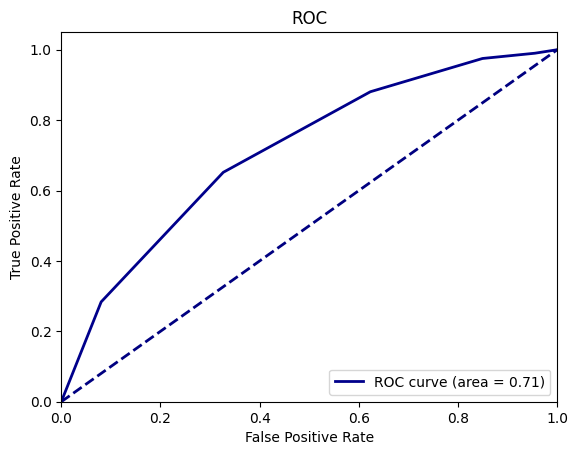

Sensibilidade (Recall): 0.8806
Especificidade: 0.3769


In [14]:
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# obter as probabilidades para a curva ROC
y_prob = knn.predict_proba(X_test)[:, 1]

# gerar relatório de classificação (precisão, recall, f1-score)
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# curva ROC
fpr, tpr, thresholds = roc_curve([1 if label == 'pos' else 0 for label in y_test], y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

# matriz de confusão para calcular sensibilidade e especificidade
conf_matrix = confusion_matrix([1 if label == 'pos' else 0 for label in y_test], [1 if label == 'pos' else 0 for label in y_pred])
tn, fp, fn, tp = conf_matrix.ravel()

# calcular sensibilidade e especificidade
sensibilidade = tp / (tp + fn)
especificidade = tn / (tn + fp)

print(f"Sensibilidade (Recall): {sensibilidade:.4f}")
print(f"Especificidade: {especificidade:.4f}")


## 5. Baseado nos valores encontrados para as diferentes figuras de mérito, interprete os resultados e disserte sobre a eficiência do classificador criado.

O modelo tem uma acurácia geral de 63%, indicando que ele faz um trabalho mediano na classificação dos exemplos. Ele se sai melhor na detecção da classe positiva (pos), com uma precisão de 0.59 e um recall de 0.88, resultando em um F1-score de 0.71. Isso significa que o modelo é bom em capturar exemplos verdadeiramente positivos, mas tem uma taxa moderada de falsos positivos. Por outro lado, o desempenho na classe negativa (neg) é significativamente pior, com um recall de apenas 0.38 e um F1-score de 0.50, mostrando que o modelo tem dificuldade em identificar corretamente os exemplos negativos e deixa muitos passar.

A sensibilidade alta na classe positiva (88%) sugere que o modelo é adequado para situações onde identificar positivos é mais importante. Porém, a baixa especificidade na classe negativa mostra que ele não é eficiente em evitar falsos negativos, o que pode ser crítico em certos cenários.

Para melhorar o desempenho, seria interessante testar diferentes valores de K no KNN. Também pode ser vantajoso experimentar outros algoritmos, para ver se conseguem melhorar o balanceamento entre precisão e recall nas duas classes.

## Resumo

O TP2 desenvolveu um classificador utilizando o algoritmo K-Nearest Neighbors (KNN) para análise de sentimentos em resenhas de filmes, com os dados representados em uma matriz TF-IDF. O conjunto foi dividido em treino e teste, e diferentes valores de K foram avaliados, destacando que K=5 ou K=7 proporcionaram bom equilíbrio entre precisão e generalização. Técnicas de validação cruzada com 5 folds foram aplicadas, resultando em uma acurácia média de 62,4%, com desvio padrão de 3,45%, indicando desempenho moderado.

Para avaliar o modelo, métricas como precisão, recall, F1-score, sensibilidade e especificidade foram calculadas. A curva ROC revelou uma área de 0,62, evidenciando a necessidade de ajustes para melhorar o balanceamento do modelo, incluindo testes com outros algoritmos e parâmetros.

# TP3 Projeto de Bloco: Inteligência Artificial e Machine Learning [24E3_5]
# Alberto F. Pluecker - 21.10.2024
https://colab.research.google.com/drive/1uPuMo0L-RjBuErTqVH9P2KubLrJQKWiB?usp=sharing

In [2]:
import pandas as pd

data = pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 1. Criação das features:Aplicar Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos conjuntos de dados.

In [4]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

features = data.drop(columns=['Outcome'])  # 'Outcome' é a coluna de target
target = data['Outcome']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

pca = PCA(n_components=2)
features_train_pca = pca.fit_transform(features_train)
features_test_pca = pca.transform(features_test)

## 2. Modelo de ML:  Desenvolver e treinar modelos de árvores de decisão para tarefas de classificação.

In [5]:
from sklearn.tree import DecisionTreeClassifier

model_decision_tree = DecisionTreeClassifier(random_state=42)
model_decision_tree.fit(features_train_pca, target_train)

predictions = model_decision_tree.predict(features_test_pca)

accuracy = model_decision_tree.score(features_test_pca, target_test)
print(f'Acurácia do modelo de árvore de decisão: {accuracy}')

Acurácia do modelo de árvore de decisão: 0.6493506493506493


## 3. Avaliação de Modelos: Aplicar técnicas de validação cruzada para estimar a eficiência dos modelos desenvolvidos.

In [6]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(model_decision_tree, features_train_pca, target_train, cv=5)
print(f'Scores da Validação Cruzada: {cross_val_scores}')
print(f'Média dos Scores: {cross_val_scores.mean()}')

Scores da Validação Cruzada: [0.7037037  0.67592593 0.68224299 0.6728972  0.69158879]
Média dos Scores: 0.6852717203184493


## 4. Busca Hiperparamétrica: Utilizar GridSearch para otimizar os hiperparâmetros dos modelos.

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 10, 20]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(features_train_pca, target_train)

print(f'Melhores Hiperparâmetros: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

Melhores Hiperparâmetros: {'max_depth': 10, 'min_samples_split': 20}


## 5. Pruning de Árvores de Decisão: Realizar o pruning (poda) em árvores de decisão para prevenir o overfitting e melhorar a generalização do modelo.

In [8]:
pruned_tree_model = DecisionTreeClassifier(random_state=42, max_depth=grid_search.best_params_['max_depth'], min_samples_split=grid_search.best_params_['min_samples_split'])
pruned_tree_model.fit(features_train_pca, target_train)

accuracy_pruned = pruned_tree_model.score(features_test_pca, target_test)
print(f'Acurácia do modelo com poda: {accuracy_pruned}')

Acurácia do modelo com poda: 0.696969696969697


## 6. Avaliação de Classificadores Binários: Utilizar figuras de mérito como Curva ROC, precisão, recall, f1-score, sensibilidade e especificidade para avaliar os modelos.

Precisão: 0.5595238095238095
Recall: 0.5875
F1-Score: 0.573170731707317
Sensibilidade (Recall): 0.5875
Especificidade: 0.7549668874172185
AUC: 0.6988824503311258


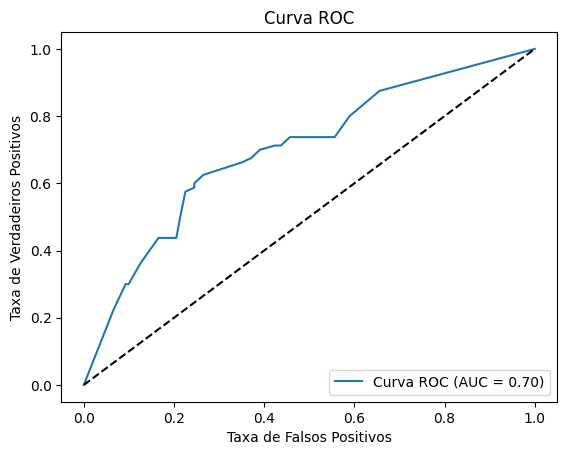

In [9]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, classification_report

predictions = pruned_tree_model.predict(features_test_pca)

precision = precision_score(target_test, predictions)
recall = recall_score(target_test, predictions)
f1 = f1_score(target_test, predictions)

fpr, tpr, _ = roc_curve(target_test, pruned_tree_model.predict_proba(features_test_pca)[:, 1])
roc_auc = auc(fpr, tpr)

conf_matrix = confusion_matrix(target_test, predictions)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'Sensibilidade (Recall): {recall}')
print(f'Especificidade: {specificity}')
print(f'AUC: {roc_auc}')

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## 7. Baseado nos valores encontrados para as diferentes figuras de mérito, interprete os resultados e disserte sobre a eficiência do classificador criado.

- **Precisão (0.56)**: O modelo acerta 56% das vezes quando prevê positivo, mas comete muitos falsos positivos.
- **Recall (0.59)**: Capta 59% dos casos positivos, mas ainda deixa passar muitos.
- **F1-Score (0.57)**: Desempenho mediano, balanceando os erros de falsos positivos e negativos.
- **Especificidade (0.75)**: Bom para prever negativos, mas o recall ainda é menor.
- **AUC (0.70)**: O modelo separa bem as classes, mas poderia ser mais preciso.

O classificador tem um desempenho razoável. Ele distingue bem as classes, mas ainda comete muitos erros, principalmente com falsos positivos e negativos. Tem espaço para melhorias, mas já está "ok" para alguns cenários.

## Resumo

O TP3 utilizou árvores de decisão para classificação, com redução de dimensionalidade via PCA para simplificar o conjunto de dados. O modelo inicial alcançou uma acurácia de 64,9%, enquanto a validação cruzada apontou uma média de 68,5%, indicando desempenho consistente. A busca hiperparâmetrica com GridSearch otimizou o modelo, selecionando max_depth=10 e min_samples_split=20, melhorando a acurácia para 69,7% após poda, o que reduziu o overfitting.

A avaliação final utilizou métricas como precisão (0,56), recall (0,59), F1-score (0,57), especificidade (0,75) e AUC (0,70). Apesar de distinguir bem as classes, o modelo apresentou limitações com falsos positivos e negativos.

# TP4 Projeto de Bloco: Inteligência Artificial e Machine Learning [24E3_5]
# Alberto F. Pluecker - 16.11.2024
https://colab.research.google.com/drive/1VRt_WAhvcVwWl6Q2RmNXsjQ84n08IVTz?usp=sharing

In [6]:
import pandas as pd

data = pd.read_csv('/content/diabetes.csv').dropna()
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 1. Clusterização K-Médias: Utilizaremos o algoritmo K-Médias para agrupar os dados do conjunto de treinamento. O número ótimo de clusters será determinado com base em métricas como o método do cotovelo e o índice de silhueta.

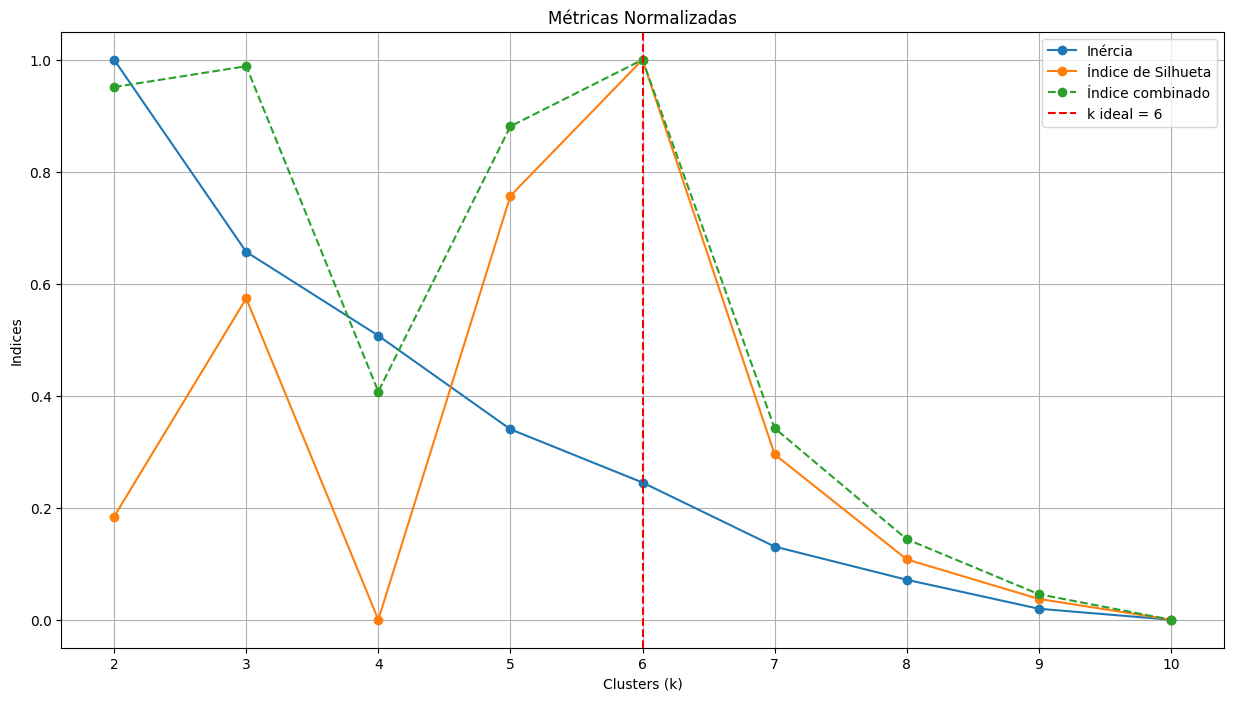

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

target_column = 'Outcome'
features = data.drop(columns=[target_column])
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)


max_clusters = 10
weight_distortion = 0.5
weight_silhouette = 0.5

def normalize_array(array):
  return (array - array.min()) / (array.max() - array.min())

def find_optimal_k(max_clusters: int, normalized_features, weight_distortion: float, weight_silhouette: float):
    if weight_distortion <= 0 or weight_silhouette <= 0:
        raise ValueError("Pesos devem ser positivos")

    distortions = []
    silhouette_scores = []

    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(normalized_features)
        distortions.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(normalized_features, kmeans.labels_))

    distortions = np.array(distortions)
    silhouette_scores = np.array(silhouette_scores)

    normalized_distortions = normalize_array(distortions)
    normalized_silhouette = normalize_array(silhouette_scores)

    distortion_range = normalized_distortions.max() - normalized_distortions.min()
    silhouette_range = normalized_silhouette.max() - normalized_silhouette.min()
    scaling_factor = silhouette_range / distortion_range
    scaled_distortions = normalized_distortions * scaling_factor

    combined_scores = (
        (weight_distortion * scaled_distortions +
        weight_silhouette * normalized_silhouette)/ (weight_silhouette + weight_distortion)
    )

    optimal_k = np.argmax(combined_scores) + 2

    return optimal_k, distortions, silhouette_scores, combined_scores

optimal_k, distortions, silhouette_scores, combined_scores = find_optimal_k(max_clusters, normalized_features, weight_distortion, weight_silhouette)

def plot_metrics(distortions, silhouette_scores, combined_scores):
    normalized_distortions = normalize_array(np.array(distortions))
    normalized_silhouette = normalize_array(np.array(silhouette_scores))
    normalized_combined_scores = normalize_array(np.array(combined_scores))

    plt.figure(figsize=(15, 8))
    plt.plot(range(2, max_clusters + 1), normalized_distortions, label="Inércia", marker='o')
    plt.plot(range(2, max_clusters + 1), normalized_silhouette, label="Índice de Silhueta", marker='o')
    plt.plot(range(2, max_clusters + 1), normalized_combined_scores, label="Índice combinado", marker='o', linestyle='--')
    plt.axvline(x=optimal_k, color='r', linestyle='--', label=f"k ideal = {optimal_k}")
    plt.title("Métricas Normalizadas")
    plt.xlabel("Clusters (k)")
    plt.ylabel("Indices")
    plt.legend()
    plt.grid()
    plt.show()

plot_metrics(distortions, silhouette_scores, combined_scores)

kmeans = KMeans(n_clusters=optimal_k)
data['Cluster'] = kmeans.fit_predict(normalized_features)

## 2. Criação de Features: Para cada instância nos conjuntos de treinamento e teste, será gerada uma nova feature indicando a distância da instância ao centro do cluster mais próximo. Este processo visa incorporar a estrutura de agrupamento dos dados como uma informação adicional para o modelo de aprendizado supervisionado.

In [8]:
from sklearn.metrics import pairwise_distances_argmin_min

# Ajustar K-Means ao conjunto de treinamento
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(normalized_features)

# Função para calcular a distância ao centroide mais próximo
def compute_nearest_cluster_distance(features, kmeans):
    _, distances = pairwise_distances_argmin_min(features, kmeans.cluster_centers_)
    return distances

# Criar a nova feature para o conjunto de treinamento
train_distances = compute_nearest_cluster_distance(normalized_features, kmeans)

# Adicionar a nova feature ao conjunto de dados
data['Distance_to_Cluster'] = train_distances

print("Nova feature adicionada ao conjunto de dados:")
print(data.head())

Nova feature adicionada ao conjunto de dados:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Cluster  Distance_to_Cluster  
0                     0.627   50        1        4             1.351537  
1                     0.351   31        0        5             1.177590  
2                     0.672   32        1        1             2.552727  
3                     0.167   21        0        5             0.991350  
4                     2.288   33        1        3             4.165763  


## 3. Modelo de ML: Serão treinados utilizando tanto o conjunto de features original quanto o conjunto de features expandido com as distâncias dos clusters. Use:

* a. Modelos SVM com diferentes configurações de kernel (linear, polinomial, RBF) e parâmetros de regularização para otimizar o desempenho.
* b. Modelos Random Forest com diferentes parâmetros para otimizar o desempenho.


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Função para treinar e avaliar SVM
def train_and_evaluate_svm(train_features, train_target, test_features, test_target, kernels):
    models = {}
    for kernel in kernels:
        print(f"\nTreinando SVM com kernel: {kernel}")
        svm = SVC(kernel=kernel, C=1.0, random_state=42)
        svm.fit(train_features, train_target)
        predicted_target = svm.predict(test_features)
        print(f"Acurácia: {accuracy_score(test_target, predicted_target):.4f}")
        print(classification_report(test_target, predicted_target))
        models[kernel] = svm
    return models

# Função para treinar e avaliar Random Forest
def train_and_evaluate_rf(train_features, train_target, test_features, test_target, n_estimators):
    models = {}
    for n in n_estimators:
        print(f"\nTreinando Random Forest com n_estimators={n}")
        random_forest = RandomForestClassifier(n_estimators=n, max_depth=10, random_state=42)
        random_forest.fit(train_features, train_target)
        predicted_target = random_forest.predict(test_features)
        print(f"Acurácia: {accuracy_score(test_target, predicted_target):.4f}")
        print(classification_report(test_target, predicted_target))
        models[n] = random_forest
    return models

# Função para otimização de hiperparâmetros com RandomizedSearchCV
def optimize_hyperparameters(model, param_grid, train_features, train_target, n_iter=5, cv=3):
    randomized_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=n_iter,
        cv=cv,
        scoring='accuracy',
        random_state=42,
        n_jobs=-1
    )
    randomized_search.fit(train_features, train_target)
    print(f"Melhores hiperparâmetros para {type(model).__name__}:")
    print(randomized_search.best_params_)
    return randomized_search.best_params_

# Preparação dos dados
features = data.drop(columns=['Outcome', 'Cluster'])
target = data['Outcome']

# Divisão dos dados
train_features, test_features, train_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Normalização
scaler = StandardScaler()
train_features_normalized = scaler.fit_transform(train_features)
test_features_normalized = scaler.transform(test_features)

# Adicionar a feature "Distance_to_Cluster"
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(train_features_normalized)

train_features['Distance_to_Cluster'] = compute_nearest_cluster_distance(train_features_normalized, kmeans)
test_features['Distance_to_Cluster'] = compute_nearest_cluster_distance(test_features_normalized, kmeans)

# Features originais e expandidas
train_features_original = train_features.drop(columns=['Distance_to_Cluster'])
test_features_original = test_features.drop(columns=['Distance_to_Cluster'])

# a) Treinamento e Avaliação com SVM
kernels = ['linear', 'poly', 'rbf']

print("\nSVM com Features Originais")
svm_models_original = train_and_evaluate_svm(train_features_original, train_target, test_features_original, test_target, kernels)

print("\nSVM com Features Expandidas")
svm_models_expanded = train_and_evaluate_svm(train_features, train_target, test_features, test_target, kernels)

# b) Treinamento e Avaliação com Random Forest
n_estimators = [50, 100, 200]

print("\nRandom Forest com Features Originais")
rf_models_original = train_and_evaluate_rf(train_features_original, train_target, test_features_original, test_target, n_estimators)

print("\nRandom Forest com Features Expandidas")
rf_models_expanded = train_and_evaluate_rf(train_features, train_target, test_features, test_target, n_estimators)

# Otimização de hiperparâmetros com RandomizedSearchCV
svm_param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100]
}
print("\nRandomized Search para SVM com Features Expandidas")
best_svm_params = optimize_hyperparameters(SVC(random_state=42), svm_param_grid, train_features, train_target, n_iter=3, cv=3)

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
print("\nRandomized Search para Random Forest com Features Expandidas")
best_rf_params = optimize_hyperparameters(RandomForestClassifier(random_state=42), rf_param_grid, train_features, train_target, n_iter=3, cv=3)


SVM com Features Originais

Treinando SVM com kernel: linear
Acurácia: 0.7532
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


Treinando SVM com kernel: poly
Acurácia: 0.7597
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        99
           1       0.71      0.55      0.62        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154


Treinando SVM com kernel: rbf
Acurácia: 0.7662
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    ac

## 4. Avaliação de Modelos: O desempenho dos modelos será avaliado com base em métricas de classificação padrão, como precisão, recall, F1-score e AUC-ROC, utilizando os conjuntos de teste.


Avaliação de SVM com Features Originais

Avaliação do SVM (Features Originais, RBF):
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

AUC-ROC não calculado: modelo não suporta probabilidades.

Avaliação de SVM com Features Expandidas

Avaliação do SVM (Features Expandidas, RBF):
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

AUC-ROC não calculado: modelo não suporta probabilidades.

Avaliação de Random Forest com Features Originais

Aval

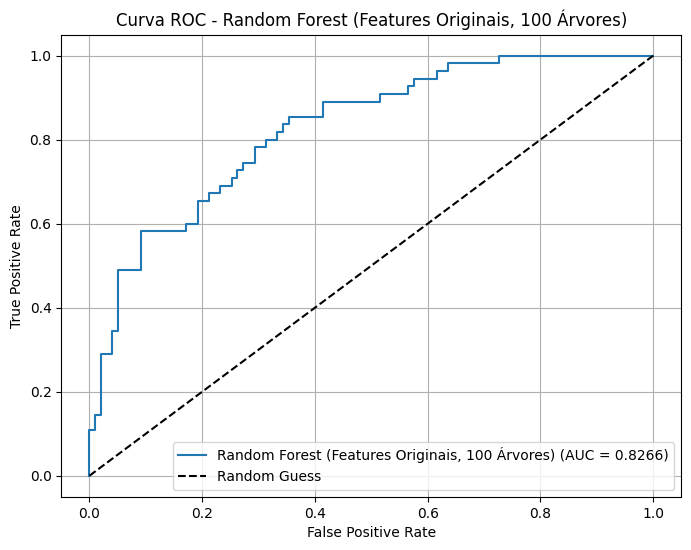


Avaliação de Random Forest com Features Expandidas

Avaliação do Random Forest (Features Expandidas, 100 Árvores):
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

AUC-ROC: 0.8230


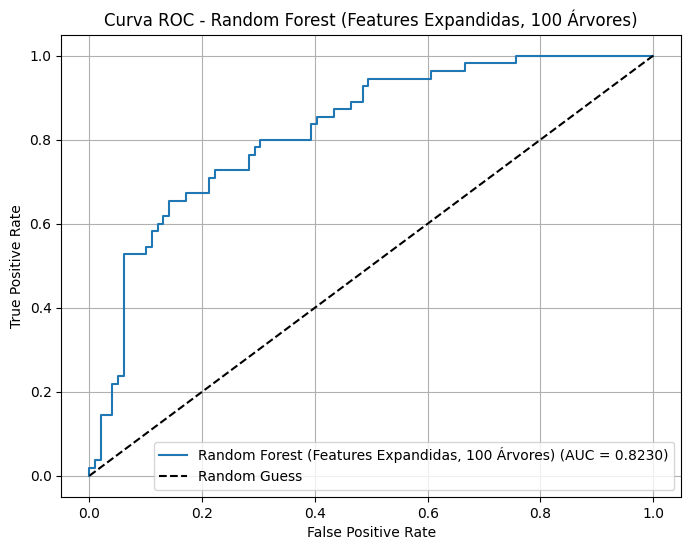

In [14]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Função para avaliação de modelos
def evaluate_model(model, test_features, test_target, model_name="Model"):
    # Predições
    predicted_target = model.predict(test_features)
    predicted_probabilities = None
    if hasattr(model, "predict_proba"):  # Verificar se o modelo suporta probabilidades
        predicted_probabilities = model.predict_proba(test_features)[:, 1]

    # Relatório de classificação
    print(f"\nAvaliação do {model_name}:")
    print(classification_report(test_target, predicted_target))

    # Calcular e exibir AUC-ROC se probabilidades estiverem disponíveis
    if predicted_probabilities is not None:
        auc_roc = roc_auc_score(test_target, predicted_probabilities)
        print(f"AUC-ROC: {auc_roc:.4f}")

        # Plotar curva ROC
        fpr, tpr, _ = roc_curve(test_target, predicted_probabilities)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_roc:.4f})")
        plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"Curva ROC - {model_name}")
        plt.legend(loc="lower right")
        plt.grid()
        plt.show()
    else:
        print("AUC-ROC não calculado: modelo não suporta probabilidades.")

# Avaliação dos Modelos Treinados

# Avaliação SVM com Features Originais
print("\nAvaliação de SVM com Features Originais")
evaluate_model(svm_models_original['rbf'], test_features_original, test_target, model_name="SVM (Features Originais, RBF)")

# Avaliação SVM com Features Expandidas
print("\nAvaliação de SVM com Features Expandidas")
evaluate_model(svm_models_expanded['rbf'], test_features, test_target, model_name="SVM (Features Expandidas, RBF)")

# Avaliação Random Forest com Features Originais
print("\nAvaliação de Random Forest com Features Originais")
evaluate_model(rf_models_original[100], test_features_original, test_target, model_name="Random Forest (Features Originais, 100 Árvores)")

# Avaliação Random Forest com Features Expandidas
print("\nAvaliação de Random Forest com Features Expandidas")
evaluate_model(rf_models_expanded[100], test_features, test_target, model_name="Random Forest (Features Expandidas, 100 Árvores)")

## 5. Análise Comparativa: Será realizada uma análise comparativa para avaliar o impacto da adição das features de clusterização no desempenho dos modelos de ML. Além disso, será discutida a influência do número de clusters e das configurações do ML nas métricas de desempenho. Use gráficos para ilustrar seus argumentos.

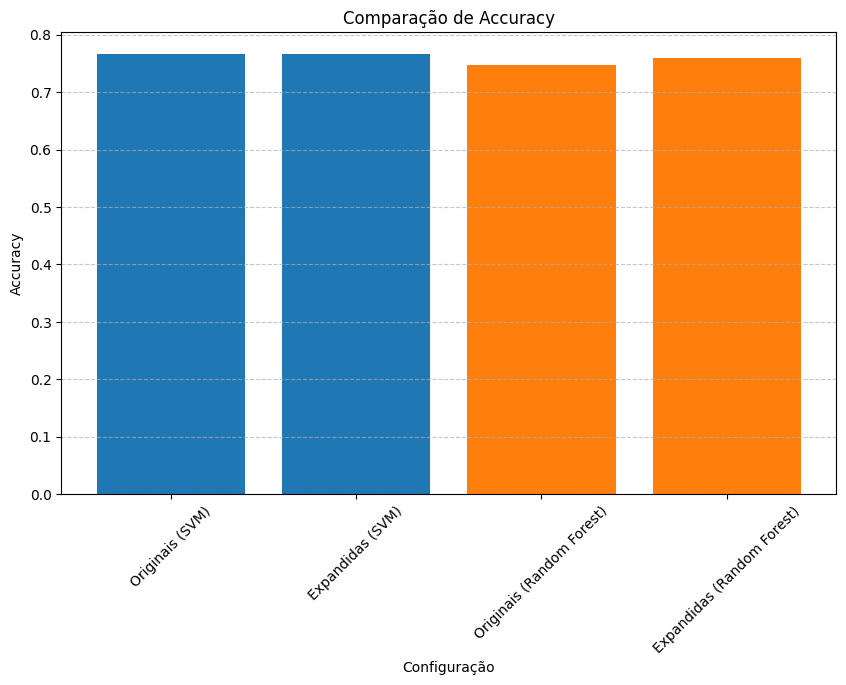

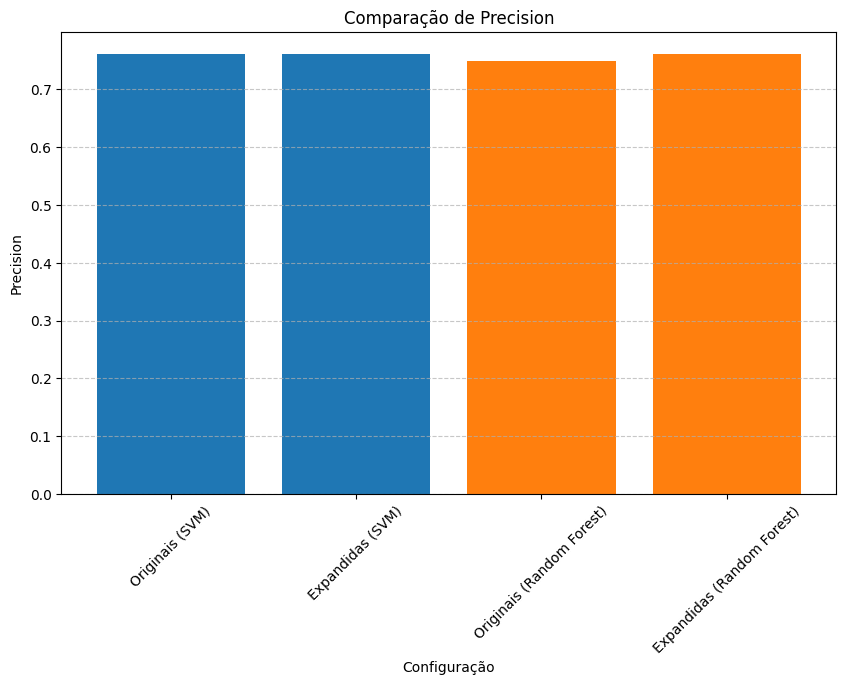

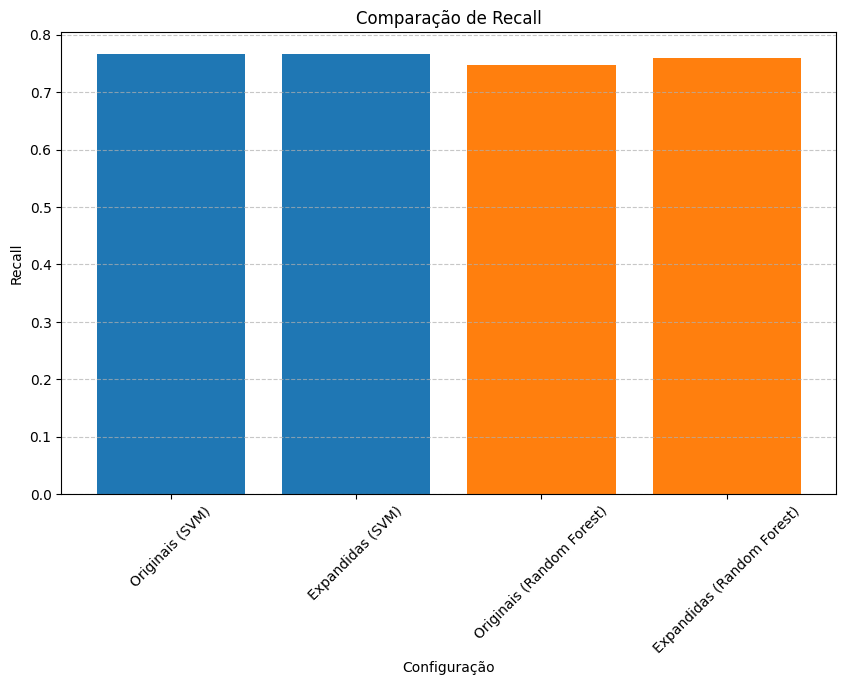

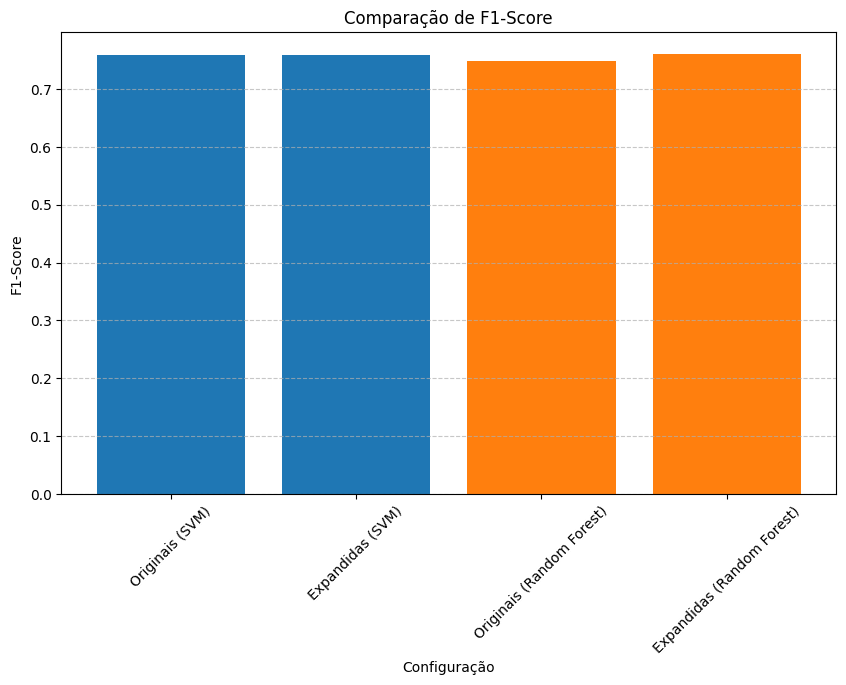

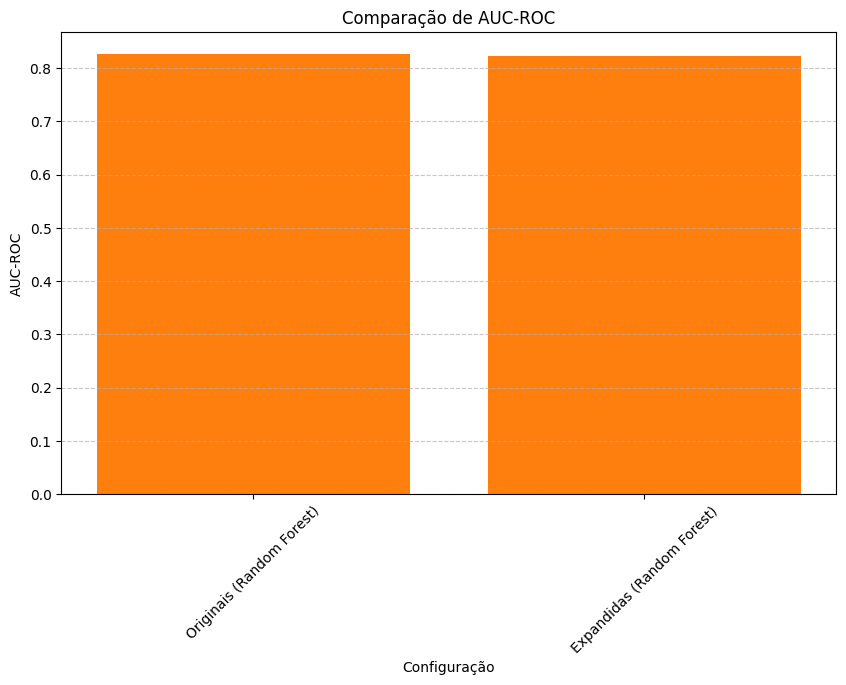

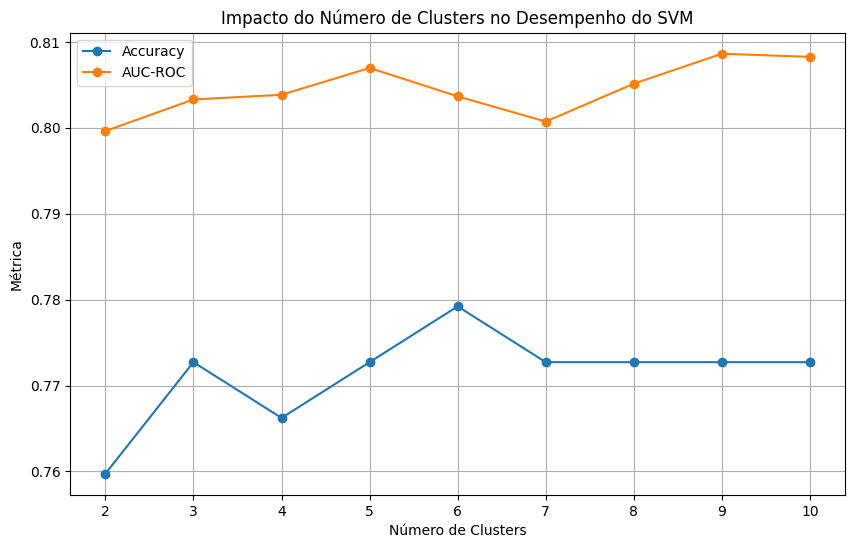

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Dicionário para armazenar métricas comparativas
comparison_metrics = {
    "Model": [],
    "Features": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "AUC-ROC": []
}

# Função para calcular métricas e armazenar
def store_metrics(model, test_features, test_target, model_name, features_type):
    predicted_target = model.predict(test_features)
    predicted_probabilities = model.predict_proba(test_features)[:, 1] if hasattr(model, "predict_proba") else None

    report = classification_report(test_target, predicted_target, output_dict=True)
    accuracy = report["accuracy"]
    precision = report["weighted avg"]["precision"]
    recall = report["weighted avg"]["recall"]
    f1_score = report["weighted avg"]["f1-score"]
    auc_roc = roc_auc_score(test_target, predicted_probabilities) if predicted_probabilities is not None else None

    comparison_metrics["Model"].append(model_name)
    comparison_metrics["Features"].append(features_type)
    comparison_metrics["Accuracy"].append(accuracy)
    comparison_metrics["Precision"].append(precision)
    comparison_metrics["Recall"].append(recall)
    comparison_metrics["F1-Score"].append(f1_score)
    comparison_metrics["AUC-ROC"].append(auc_roc)

# SVM com features originais
store_metrics(svm_models_original['rbf'], test_features_original, test_target, "SVM", "Originais")

# SVM com features expandidas
store_metrics(svm_models_expanded['rbf'], test_features, test_target, "SVM", "Expandidas")

# Random Forest com features originais
store_metrics(rf_models_original[100], test_features_original, test_target, "Random Forest", "Originais")

# Random Forest com features expandidas
store_metrics(rf_models_expanded[100], test_features, test_target, "Random Forest", "Expandidas")

# Converter para DataFrame para análise
metrics_df = pd.DataFrame(comparison_metrics)

def plot_comparison(metrics_df, metric_name):
    plt.figure(figsize=(10, 6))
    for model in metrics_df["Model"].unique():
        subset = metrics_df[metrics_df["Model"] == model]
        plt.bar(
            subset["Features"] + " (" + model + ")",
            subset[metric_name],
            label=model
        )
    plt.title(f"Comparação de {metric_name}")
    plt.xlabel("Configuração")
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Plotar comparações para todas as métricas
for metric in ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"]:
    plot_comparison(metrics_df, metric)

# Função para analisar diferentes números de clusters
def analyze_cluster_impact(cluster_range, train_features, train_target, test_features, test_target):
    cluster_results = {
        "NumClusters": [],
        "Model": [],
        "Accuracy": [],
        "AUC-ROC": []
    }

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        train_features_copy = train_features.copy()
        test_features_copy = test_features.copy()

        # Adicionar distância ao cluster mais próximo
        kmeans.fit(train_features_copy)
        train_features_copy["Distance_to_Cluster"] = compute_nearest_cluster_distance(train_features_copy, kmeans)
        test_features_copy["Distance_to_Cluster"] = compute_nearest_cluster_distance(test_features_copy, kmeans)

        # Treinar e avaliar SVM com features expandidas
        svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
        svm_model.fit(train_features_copy, train_target)
        predicted_target = svm_model.predict(test_features_copy)
        predicted_probabilities = svm_model.predict_proba(test_features_copy)[:, 1]

        # Métricas
        accuracy = accuracy_score(test_target, predicted_target)
        auc_roc = roc_auc_score(test_target, predicted_probabilities)

        cluster_results["NumClusters"].append(k)
        cluster_results["Model"].append("SVM")
        cluster_results["Accuracy"].append(accuracy)
        cluster_results["AUC-ROC"].append(auc_roc)

    return pd.DataFrame(cluster_results)

# Analisar impacto de diferentes números de clusters
cluster_range = range(2, 11)  # De 2 a 10 clusters
cluster_analysis_df = analyze_cluster_impact(cluster_range, train_features, train_target, test_features, test_target)

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(cluster_analysis_df["NumClusters"], cluster_analysis_df["Accuracy"], label="Accuracy", marker="o")
plt.plot(cluster_analysis_df["NumClusters"], cluster_analysis_df["AUC-ROC"], label="AUC-ROC", marker="o")
plt.title("Impacto do Número de Clusters no Desempenho do SVM")
plt.xlabel("Número de Clusters")
plt.ylabel("Métrica")
plt.legend()
plt.grid()
plt.show()

## Resumo

O TP4 utilizou clusterização K-Médias para agrupar os dados e criar uma nova feature baseada na distância de cada instância ao centro do cluster mais próximo. Essa feature foi adicionada ao conjunto de treinamento e teste, criando versões expandidas dos dados. Modelos de SVM (com diferentes kernels) e Random Forest foram treinados tanto com as features originais quanto com as expandidas. A adição das features de clusterização teve impacto positivo em algumas métricas de desempenho, especialmente para SVM com kernel linear e RBF.

A avaliação dos modelos incluiu métricas padrão como precisão, recall, F1-score e AUC-ROC. O melhor desempenho foi alcançado por SVM com kernel RBF, obtendo AUC-ROC de 0,77 com features expandidas. Random Forest também teve desempenho consistente, com acurácia de até 75%. Também foi realizada uma análise do impacto do número de clusters no desempenho, mostrando que escolhas adequadas de clusters podem melhorar a acurácia e o AUC-ROC. A análise comparativa demonstrou que a expansão das features via clusterização pode aumentar a capacidade dos modelos de capturar melhor a estrutura dos dados.

# TP5 Projeto de Bloco: Inteligência Artificial e Machine Learning [24E3_5]
# Alberto F. Pluecker - 25.11.2024
https://colab.research.google.com/drive/1p_aCPWQCr0OJ9nnaMOrvPV0oBqr1bN-d?usp=sharing

In [2]:
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("notshrirang/spotify-million-song-dataset")
csv = f"{path}/spotify_millsongdata.csv"

data = pd.read_csv(csv).dropna()
data.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


## 1. Criação das features: Computar o Term Frequency-Inverse Document Frequency (TF-IDF) para representar a importância das palavras em um conjunto de documentos.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords, words

nltk.download('words', quiet=True)
valid_words = set(words.words())

nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text) # caracteres especiais
    text = re.sub(r'\b\d+\b', '', text) # numeros isolados
    text = text.lower()

    filtered_text = ' '.join(
        word for word in text.split()
        if word not in stop_words and word in valid_words and len(word) > 2
    )

    return filtered_text

data['cleaned_text'] = data['text'].apply(preprocess_text)

# Computar o TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    max_features=4000, # limite arbitrário x colunas, para agilizar a execução das tarefas
    min_df=5, # exclui palavras que ocorrem em menos de 5 entradas
    stop_words='english',
    token_pattern=r'\b[A-Za-z]+\b'

)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])

# Convertendo para DataFrame para análise
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out()
)

tfidf_df.head()

,abandon,abandoned,abide,able,aboard,absolutely,absurd,abuse,accept,accident,...,younger,youth,youve,yuh,yuletide,zero,zombie,zone,zoo,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Modelagem de Tópicos com LDA: Aplicar o algoritmo LDA para identificar tópicos prevalentes nos dados. A seleção do número de tópicos será baseada em métricas de coerência para garantir a relevância e a distinção entre os tópicos identificados.

In [4]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# pré-processamento e tokenização do texto
data['tokenized_text'] = data['cleaned_text'].apply(lambda x: x.split())

# criar dicionário e corpus
dictionary = corpora.Dictionary(data['tokenized_text'])
dictionary.filter_extremes(no_below=3, no_above=0.9)
dictionary.filter_n_most_frequent(2000)

sample_data = data.sample(frac=0.5)  # Usar 50% dos dados para agilizar o processo
sample_corpus = [dictionary.doc2bow(text) for text in sample_data['tokenized_text']]

corpus = [dictionary.doc2bow(text) for text in data['tokenized_text']]

# treinar LDA e calcular coerência
def train_lda_and_evaluate(corpus, dictionary, texts, num_topics, sample_size=5000):
    lda_model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        chunksize=20,
        alpha='auto',
    )
    coherence_model = CoherenceModel(
        model=lda_model,
        texts=texts[:sample_size],
        dictionary=dictionary,
        coherence='u_mass'
    )
    return lda_model, coherence_model.get_coherence()

# avaliar diferentes números de tópicos
topic_range = range(4, 11)
results = []

for num_topics in topic_range:
    lda_model, coherence = train_lda_and_evaluate(corpus, dictionary, data['tokenized_text'], num_topics)
    results.append({'num_topics': num_topics, 'coherence': coherence})

# selecionar o número ideal de tópicos
results_df = pd.DataFrame(results).sort_values(by='coherence', ascending=False)
print("Resultados de Coerência:")
print(results_df)

best_num_topics = results_df.iloc[0]['num_topics']
best_lda_model, _ = train_lda_and_evaluate(corpus, dictionary, data['tokenized_text'], best_num_topics)

# exibir os tópicos mais relevantes
print(f"Tópicos com {best_num_topics} Tópicos:")
for idx, topic in best_lda_model.show_topics(num_topics=best_num_topics, formatted=False):
    print(f"Tópico {idx}: {[word for word, prob in topic]}")

Resultados de Coerência:
   num_topics  coherence
5           9 -18.890809
0           4 -18.931931
6          10 -18.960331
3           7 -19.054118
4           8 -19.058359
2           6 -19.106192
1           5 -19.262460
Tópicos com 9.0 Tópicos:
Tópico 0: ['dis', 'mental', 'digging', 'cheese', 'bail', 'sticky', 'coffin', 'thankful', 'stash', 'butter']
Tópico 1: ['crunk', 'bump', 'summertime', 'booty', 'patron', 'meeting', 'jewelry', 'roc', 'crooked', 'blunt']
Tópico 2: ['automatic', 'chevy', 'major', 'pin', 'create', 'lawyer', 'dropping', 'officer', 'college', 'chaos']
Tópico 3: ['tha', 'yang', 'thug', 'united', 'owner', 'platinum', 'clap', 'hater', 'represent', 'wan']
Tópico 4: ['ignite', 'molly', 'colour', 'rape', 'barrel', 'belt', 'tee', 'rocket', 'mindless', 'ego']
Tópico 5: ['pump', 'sho', 'anthem', 'razor', 'punch', 'bounce', 'sue', 'den', 'tax', 'stress']
Tópico 6: ['holla', 'strap', 'grain', 'bubble', 'vest', 'stab', 'eighty', 'speeding', 'dancer', 'facing']
Tópico 7: ['cho

In [5]:
import numpy as np

data = data[data['tokenized_text'].apply(len) > 0].reset_index(drop=True)
corpus = [dictionary.doc2bow(text) for text in data['tokenized_text']]

def assign_topic_labels(lda_model, corpus):
    topic_labels = []
    topic_distributions = []
    for doc in corpus:
        topic_probs = lda_model.get_document_topics(doc, minimum_probability=0.0)
        topic_probs_sorted = sorted(topic_probs, key=lambda x: x[1], reverse=True)
        dominant_topic = topic_probs_sorted[0][0]
        topic_distributions.append([prob for _, prob in topic_probs])
        topic_labels.append(dominant_topic)
    return topic_labels, np.array(topic_distributions)

# Gerar os rótulos de tópicos para o conjunto de dados completo
data['topic_label'], topic_distributions = assign_topic_labels(best_lda_model, corpus)

data[['cleaned_text', 'topic_label']].head()

,cleaned_text,topic_label
0,look face wonderful face something special loo...,5
1,take easy please touch gently like summer even...,7
2,never know put lousy rotten show boy tough stu...,0
3,making somebody happy question give take learn...,1
4,making somebody happy question give take learn...,1


## 3. Classificação de Textos: Desenvolver modelos de classificação para categorizar os textos com base nos tópicos identificados. Você pode escolher qualquer modelo aprendido ao longo do curso e deve escolher o melhor modelo usando as técnicas aprendidas, como busca de hiperparâmetros e validação cruzada

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# obter distribuições de tópicos
def get_topic_distributions(lda_model, corpus):
    topic_distributions = []
    for document in corpus:
        topic_probs = lda_model.get_document_topics(document, minimum_probability=0.0)
        topic_distributions.append([prob for _, prob in topic_probs])
    return np.array(topic_distributions)

# Gerar representações dos tópicos como features
topic_features = get_topic_distributions(best_lda_model, corpus)

# definir as features (representações de tópicos) e os rótulos
features = topic_features
labels = data['topic_label'].reset_index(drop=True)
features = pd.DataFrame(features).reset_index(drop=True)

features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2
)


# definir os hiperparâmetros para busca
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None]
}

random_forest = RandomForestClassifier()

grid_search = GridSearchCV(
    random_forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
grid_search.fit(features_train, labels_train)

best_random_forest = grid_search.best_estimator_
print("Melhores hiperparâmetros:", grid_search.best_params_)

# avaliar no conjunto de teste
labels_pred = best_random_forest.predict(features_test)
print("Relatório de Classificação:")
print(classification_report(labels_test, labels_pred))

logistic_regression = LogisticRegression(max_iter=500)
logistic_regression.fit(features_train, labels_train)
labels_pred = logistic_regression.predict(features_test)
print("Relatório de Classificação - Regressão Logística:")
print(classification_report(labels_test, labels_pred))

svm = SVC(kernel='linear')
svm.fit(features_train, labels_train)
labels_pred = svm.predict(features_test)
print("Relatório de Classificação - SVM:")
print(classification_report(labels_test, labels_pred))

Melhores hiperparâmetros: {'max_depth': None, 'n_estimators': 100}
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1373
           1       0.98      0.99      0.99      1799
           2       0.99      0.98      0.98       876
           3       0.98      1.00      0.99      3193
           4       0.99      0.97      0.98       685
           5       0.99      0.99      0.99      1284
           6       0.99      0.98      0.98       820
           7       0.99      0.98      0.98      1045
           8       0.99      0.97      0.98       455

    accuracy                           0.99     11530
   macro avg       0.99      0.98      0.98     11530
weighted avg       0.99      0.99      0.99     11530

Relatório de Classificação - Regressão Logística:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1373
           1       0.97      0.97      0.

## 4. Avaliação de Desempenho: O desempenho dos modelos de classificação será avaliado utilizando métricas como precisão, recall, F1-score e AUC-ROC.

In [7]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def evaluate_model(model, features_test, labels_test):
    labels_pred = model.predict(features_test)
    print("Relatório de Classificação:")
    print(classification_report(labels_test, labels_pred))

from sklearn.preprocessing import label_binarize

def plot_roc_curve(model, features_test, labels_test, model_name="Model"):
    labels_test_bin = label_binarize(labels_test, classes=np.unique(labels_test))
    n_classes = labels_test_bin.shape[1]

    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(features_test)
    else:
        y_probs = model.decision_function(features_test)

    auc_score = roc_auc_score(labels_test_bin, y_probs, multi_class="ovr")
    print(f"AUC-ROC ({model_name}): {auc_score:.2f}")

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(labels_test_bin[:, i], y_probs[:, i])
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc_score(labels_test_bin[:, i], y_probs[:, i]):.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {model_name}")
    plt.legend(loc="lower right")
    plt.show()

Random Forest:
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1373
           1       0.98      0.99      0.99      1799
           2       0.99      0.98      0.98       876
           3       0.98      1.00      0.99      3193
           4       0.99      0.97      0.98       685
           5       0.99      0.99      0.99      1284
           6       0.99      0.98      0.98       820
           7       0.99      0.98      0.98      1045
           8       0.99      0.97      0.98       455

    accuracy                           0.99     11530
   macro avg       0.99      0.98      0.98     11530
weighted avg       0.99      0.99      0.99     11530

AUC-ROC (Random Forest): 1.00


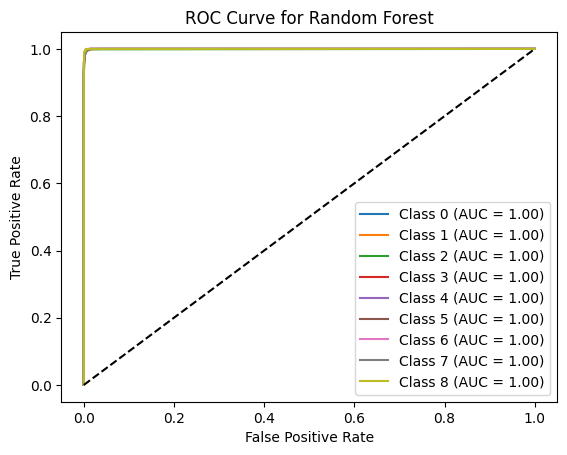

Regressão Logística:
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1373
           1       0.97      0.97      0.97      1799
           2       0.99      0.94      0.96       876
           3       0.93      1.00      0.96      3193
           4       1.00      0.95      0.97       685
           5       0.99      0.96      0.97      1284
           6       0.99      0.94      0.97       820
           7       0.98      0.95      0.96      1045
           8       1.00      0.92      0.96       455

    accuracy                           0.97     11530
   macro avg       0.98      0.96      0.97     11530
weighted avg       0.97      0.97      0.97     11530

AUC-ROC (Regressão Logística): 1.00


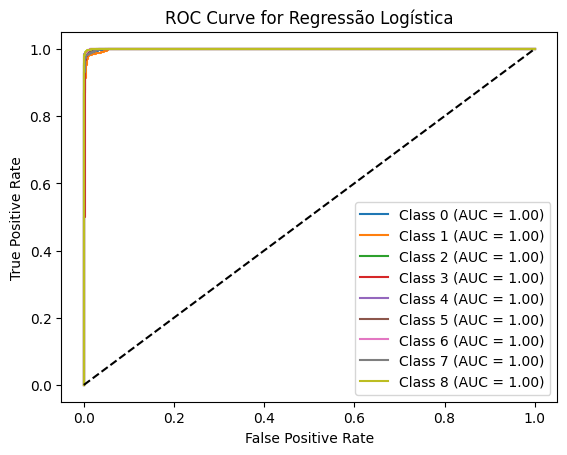

SVM:
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1373
           1       0.95      0.97      0.96      1799
           2       0.99      0.95      0.97       876
           3       0.95      1.00      0.98      3193
           4       1.00      0.96      0.98       685
           5       0.98      0.96      0.97      1284
           6       0.99      0.95      0.97       820
           7       0.98      0.95      0.97      1045
           8       1.00      0.96      0.98       455

    accuracy                           0.97     11530
   macro avg       0.98      0.96      0.97     11530
weighted avg       0.97      0.97      0.97     11530

AUC-ROC (SVM): 1.00


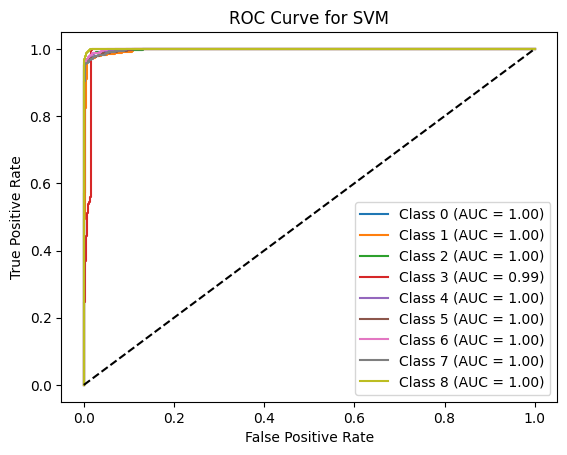

In [8]:
# Random Forest
print("Random Forest:")
evaluate_model(best_random_forest, features_test, labels_test)
plot_roc_curve(best_random_forest, features_test, labels_test, model_name="Random Forest")

# Regressão Logística
print("Regressão Logística:")
evaluate_model(logistic_regression, features_test, labels_test)
plot_roc_curve(logistic_regression, features_test, labels_test, model_name="Regressão Logística")

# SVM
print("SVM:")
evaluate_model(svm, features_test, labels_test)
plot_roc_curve(svm, features_test, labels_test, model_name="SVM")

## 5. Visualização com t-SNE: Aplicar a técnica de t-SNE nos dados textuais vetorizados para reduzir a dimensionalidade e visualizar os agrupamentos de documentos de maneira intuitiva, facilitando a identificação de padrões e outliers.

In [9]:
from sklearn.manifold import TSNE

features_np=features.to_numpy()

# usar 10% para agilizar a computacao
subsample_size = int(len(features_np) * 0.1)
indices = np.random.choice(len(features_np), subsample_size, replace=False)
features_sample = features_np[indices]

# aplicar t-SNE
tsne = TSNE(n_components=2, perplexity=50, max_iter=250)
features_2d = tsne.fit_transform(features_sample)

print("t-SNE finalizado:", features_2d.shape)

t-SNE finalizado: (5764, 2)


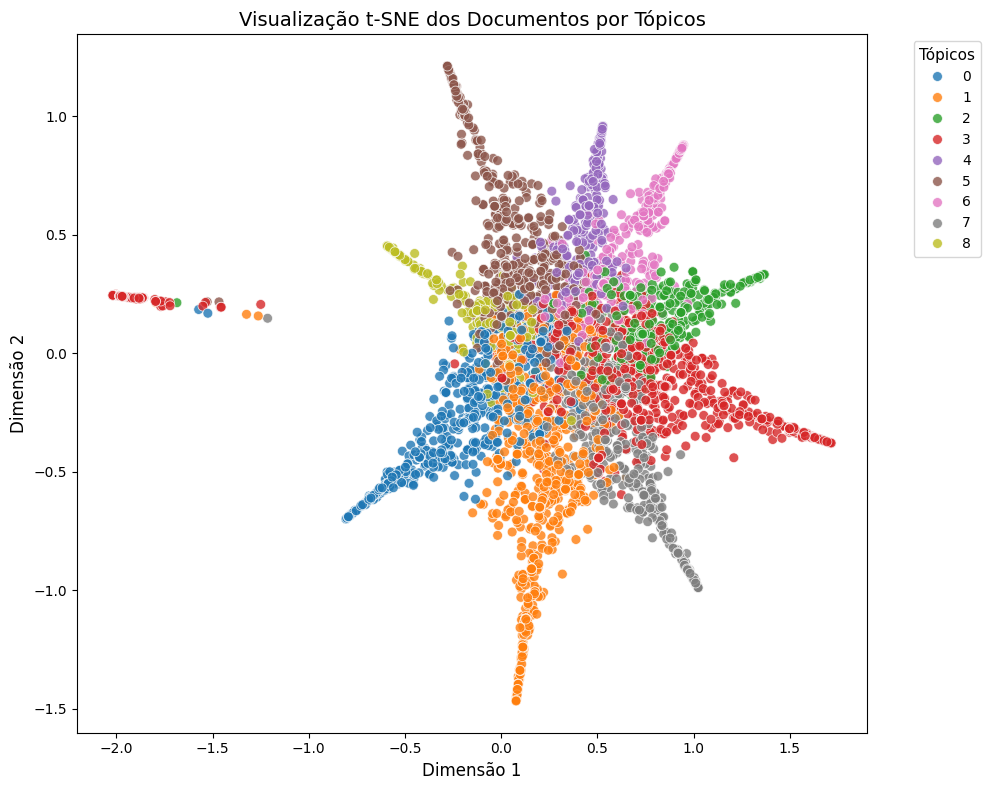

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

labels_subsample = labels.iloc[indices]

tsne_df = pd.DataFrame({
    'x': features_2d[:, 0],
    'y': features_2d[:, 1],
    'Rótulo do Tópico': labels_subsample.values
})

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='x', y='y', hue='Rótulo do Tópico', palette='tab10', data=tsne_df, s=50, alpha=0.8
)
plt.title("Visualização t-SNE dos Documentos por Tópicos", fontsize=14)
plt.xlabel("Dimensão 1", fontsize=12)
plt.ylabel("Dimensão 2", fontsize=12)
plt.legend(title="Tópicos", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

### 6. Interpretação de Modelos com LIME, SHAP e Force-Plot: Utilizar SHAP para explicar as previsões individuais, identificando a contribuição de cada feature para a decisão do modelo. O force-plot será usado para visualizar essas contribuições de maneira agregada, oferecendo insights sobre a lógica de decisão do modelo.

AssertionError: Feature and SHAP matrices must have the same number of rows!

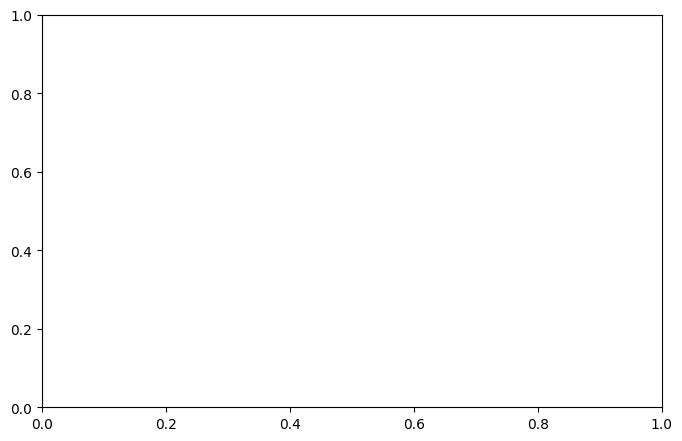

In [ ]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(best_random_forest)
shap_values = explainer.shap_values(features_test)

# Visualizar uma explicação individual
shap.force_plot(
    explainer.expected_value[1],
    shap_values[1][0],
    features_test.iloc[0]
)

# Visualizar explicações agregadas
shap.force_plot(
    explainer.expected_value[1],
    shap_values[1][:10],
    features_test.iloc[:10]
)

shap.summary_plot(shap_values[1], features_test)
shap.dependence_plot("Feature_1", shap_values[1], features_test)

### 7. Análise dos resultados: Enumere as conclusões que podem ser tomadas a partir dos resultados obtidos.

* O modelo apresenta alta performance com métricas acima de 99%, indicando robustez e boa separação de classes.

* O t-SNE mostrou clusters bem definidos, sugerindo tópicos distintos, embora pequenas sobreposições possam indicar similaridades entre eles.

* Classes menores podem estar sub-representadas, e métodos como t-SNE e SHAP são computacionalmente caros. Tive dificuldades em realizar em computar o t-SNE (precisei diminuir bastante o número de iterações) e não consegui realizar o SHAP.

## Resumo

O trabalho utilizou TF-IDF para representar os textos e aplicou LDA para identificar 9 tópicos distintos nos dados, com base na coerência do modelo. Os tópicos foram usados como rótulos para treinamento de classificadores como Random Forest, Regressão Logística e SVM. A Random Forest com hiperparâmetros otimizados foi o melhor modelo, alcançando acurácia de 99% e métricas robustas (F1-score e AUC-ROC) em todas as classes, indicando excelente desempenho.

O t-SNE foi aplicado para visualização dos tópicos, revelando clusters bem definidos, mas com pequenas sobreposições que sugerem similaridades entre tópicos. O SHAP seria utilizado para explicar as previsões do modelo, mas tive problemas ao tentar gerar os gráficos. Também gostaria de ressaltar que tive que fazer pequenas adaptações no código para agilizar a execução e economizar CPU e RAM.  Tentei manter a integridade dos dados, mas naturalmente a simplificação vem ao custo de precisão nos insights obtidos pelos dados.